<a href="https://colab.research.google.com/github/chuchu0428/quaaf-streamlit-dashboard/blob/main/S%26P500_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install yfinance
import yfinance as yf
import pandas as pd

import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import pdist

pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

[*********************100%***********************]  20 of 20 completed


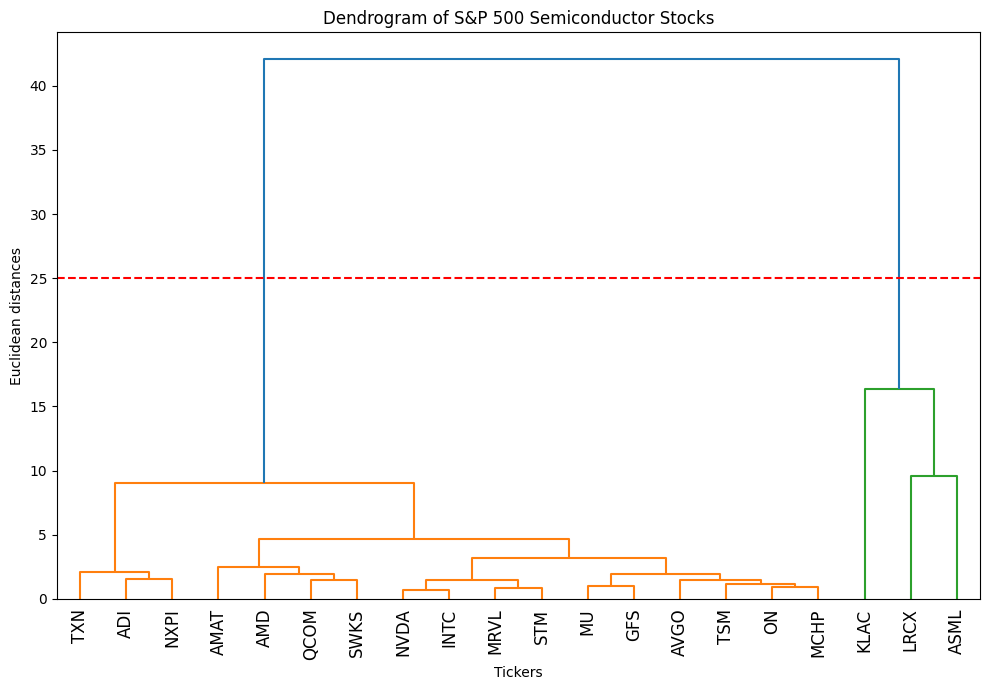

In [99]:
# Get the list of S&P 500 semiconductor tickers (you'll need to find this list yourself)
semiconductor_tickers = [
    "NVDA",  # NVIDIA Corporation
    "AMD",   # Advanced Micro Devices, Inc.
    "INTC",  # Intel Corporation
    "AVGO",  # Broadcom Inc.
    "TXN",   # Texas Instruments Incorporated
    "QCOM",  # Qualcomm Incorporated
    "MU",    # Micron Technology, Inc.
    "ADI",   # Analog Devices, Inc.
    "AMAT",  # Applied Materials, Inc.
    "LRCX",  # Lam Research Corporation
    "KLAC",  # KLA Corporation
    "MRVL",  # Marvell Technology Group Ltd.
    "SWKS",  # Skyworks Solutions, Inc.
    "ON",    # ON Semiconductor Corporation
    "ASML",  # ASML Holding N.V.
    "MCHP",  # Microchip Technology Incorporated
    "NXPI",  # NXP Semiconductors N.V.
    "TSM",   # Taiwan Semiconductor Manufacturing Company
    "STM",   # STMicroelectronics N.V.
    "GFS"    # GLOBALFOUNDRIES Inc.
]


# Download the data
data = yf.download(semiconductor_tickers, start="2023-01-01", end="2023-12-31")

# Optionally, select only the 'Adj Close' prices
adj_close_df = data['Adj Close']

# Create an empty list to store the data
financial_data = []

# Loop through the tickers
for ticker in semiconductor_tickers:
  try:
    stock = yf.Ticker(ticker)
    financials = stock.financials
    # Transpose the dataframe and reset the index
    financials_transposed = financials.T.reset_index()
    # Add a ticker column
    financials_transposed['Ticker'] = ticker
    financial_data.append(financials_transposed)
  except Exception as e:
    print(f"Error fetching data for {ticker}: {e}")

# Concatenate all the dataframes
all_financials = pd.concat(financial_data)

# Filter rows starting with '2023' in the index
all_financials = all_financials[all_financials['index'].astype(str).str.startswith('2023')]

# Set 'Ticker' as the index
all_financials = all_financials.set_index('Ticker')

# Drop the 'index' column
all_financials = all_financials.drop(columns=['index'])

# Concatenate the dataframes
combined_df = pd.concat([all_financials, adj_close_df.T], axis=1)

result = combined_df.dropna(axis=1)

# Standardize the data (important for clustering)

numerical_cols = result.select_dtypes(include=['float', 'int']).columns
numerical_data = result[numerical_cols]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)


plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='average'), labels=result.index)
plt.title('Dendrogram of S&P 500 Semiconductor Stocks')
plt.xlabel('Tickers')
plt.axhline(y=25, color='r', linestyle='--')
plt.ylabel('Euclidean distances')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [96]:
#show final groups

# Set a cut-off (k) for the number of clusters you want or determine it visually from the dendrogram
k = 2  # Example: Creating 3 clusters

# Example: Use different distance metrics
D = pdist(scaled_data, metric='euclidean')

# Calculate the linkage matrix (This was missing)
Z = linkage(D, method='average')

# Get cluster labels
labels = fcluster(Z, k, criterion='maxclust') # Use the linkage matrix here

# Create a DataFrame to show stock tickers and their assigned clusters
cluster_df = pd.DataFrame({'Ticker': result.index, 'Cluster': labels})
print(cluster_df)

   Ticker  Cluster
0    NVDA        1
1     AMD        1
2    INTC        1
3    AVGO        1
4     TXN        1
5    QCOM        1
6      MU        1
7     ADI        1
8    AMAT        1
9    LRCX        2
10   KLAC        2
11   MRVL        1
12   SWKS        1
13     ON        1
14   ASML        2
15   MCHP        1
16   NXPI        1
17    TSM        1
18    STM        1
19    GFS        1


In [97]:
from sklearn.metrics import silhouette_score
score = silhouette_score(scaled_data, labels)
print(score)

0.8401044480677236
